In [76]:
# Import the required functionality
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline  

from sklearn.impute import KNNImputer 

from pandas.plotting import scatter_matrix

from sklearn import neighbors

In [77]:
df = pd.read_csv('WINE_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


A priliminary scan of the data indicates a lot of missing values for the features. 

The STARS feature in particular has 26.25% of data missing

In [78]:
for x in ['TARGET','LabelAppeal','STARS']:
    print(df[x].value_counts().shape)

(9,)
(5,)
(4,)


5 different types of Label Appeal values and 4 types of STAR ratings for the data

Lower STAR rating results in lesser number of wine TARGETS being sampled. Hence, the missing values can be imputed as 0 for STAR

In [79]:
# Mean, SD and Min-MAx of all the features

df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


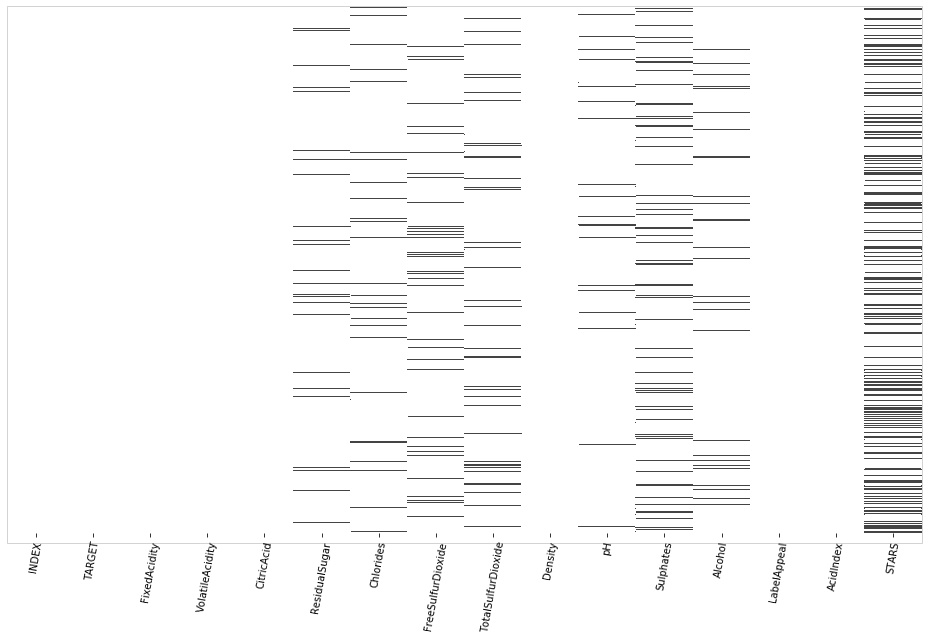

In [80]:
# Exploring data for missing values using HeatMap

naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [81]:
# Counting the missing values in the data

print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [82]:
# Imputing missing values in STAR column with 0s

df['STARS'].replace(to_replace = np.nan, value = 0)

0        2.0
1        3.0
2        3.0
3        1.0
4        2.0
        ... 
12790    0.0
12791    2.0
12792    2.0
12793    2.0
12794    2.0
Name: STARS, Length: 12795, dtype: float64

In [83]:
# Scaling the data using MinMax scaler

scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a8580d0>,
      dtype=object)

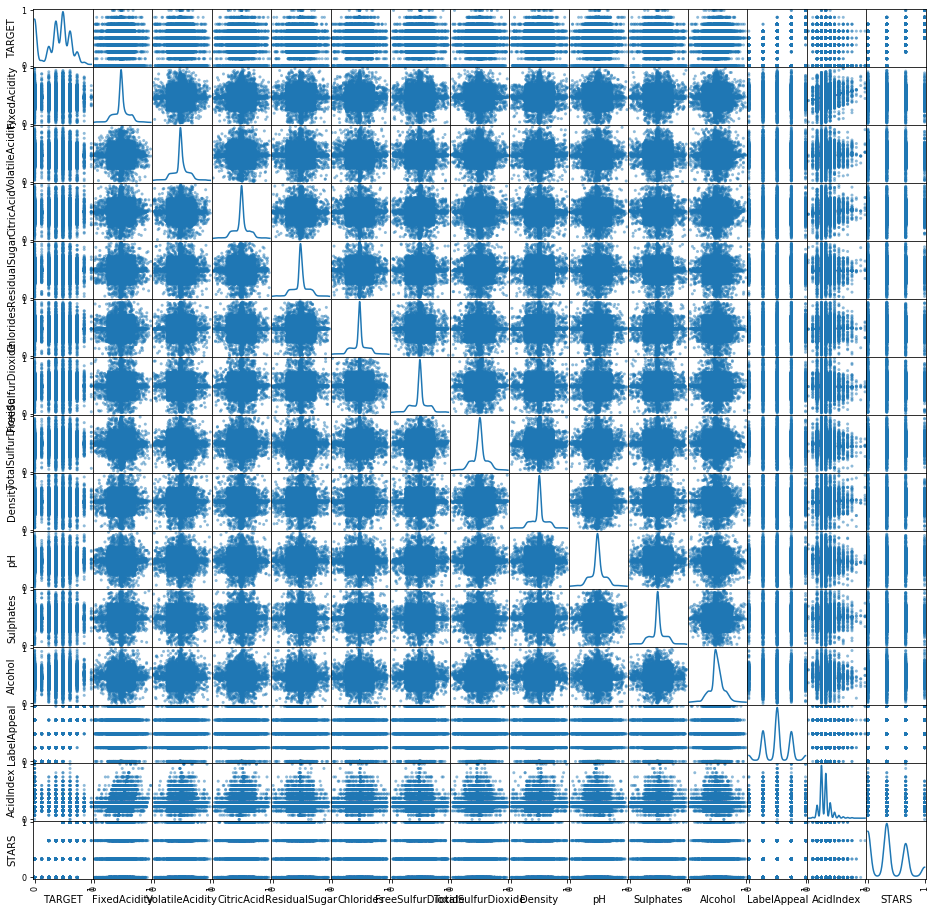

In [84]:
# Scatter Plot

scatter_matrix(scaled_data[["TARGET","FixedAcidity","VolatileAcidity","CitricAcid",
                            "ResidualSugar","Chlorides","FreeSulfurDioxide","TotalSulfurDioxide",
                            "Density","pH","Sulphates","Alcohol","LabelAppeal","AcidIndex","STARS"]], figsize=(16, 16), diagonal='kde')

The Scatter plots indicate that lower Label Appeal implies lesser number of TARGET samples.


The plot of TARGEt vs STARS show greater the STAR rating, higher the number of TARGET samples sold

The scatter plots also indicate that there is no correlation between features like Ciric Acid, Acid content, Fixed Acidity etc.

The plots do not show any outlier for the features

In [85]:
scaled_data.corr()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,1.000000,0.001256,0.001133,-0.010224,0.004922,0.003846,0.002966,0.009257,0.010756,-0.010779,-0.005853,0.006413,-0.007677,0.011553,-0.007097,0.000194
TARGET,0.001256,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.558794
FixedAcidity,0.001133,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.006628
VolatileAcidity,-0.010224,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.034431
CitricAcid,0.004922,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.000665
ResidualSugar,0.003846,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.016741
Chlorides,0.002966,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.004931
FreeSulfurDioxide,0.009257,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,-0.009082
TotalSulfurDioxide,0.010756,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.013929
Density,-0.010779,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.018284


Strong positive correlation between TARGET and (LabelAppeal & STARS)

Strong negative correlation between TARGET and AcidIndex

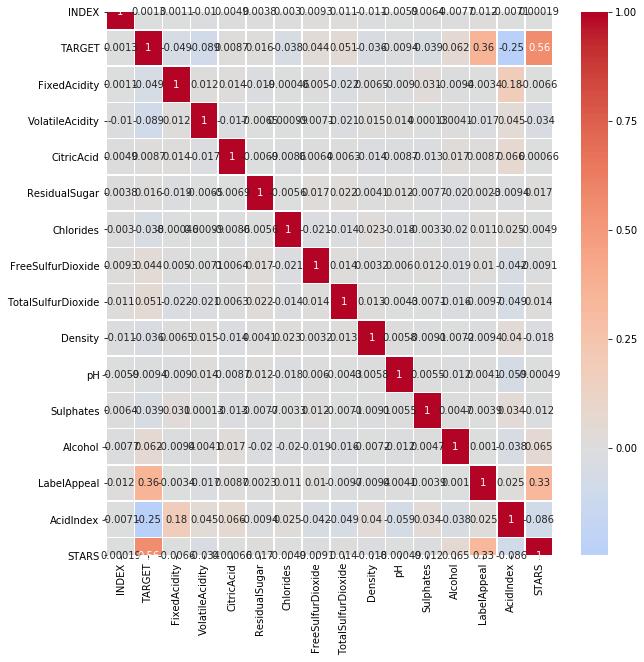

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

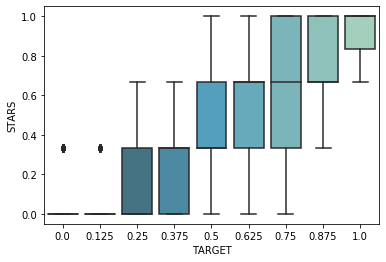

In [87]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["STARS"],data=scaled_data,palette='GnBu_d')

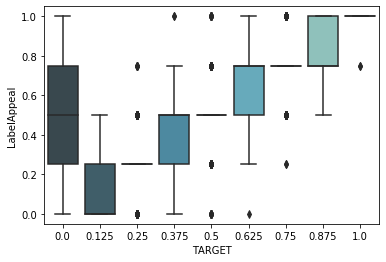

In [88]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["LabelAppeal"],data=scaled_data,palette='GnBu_d')

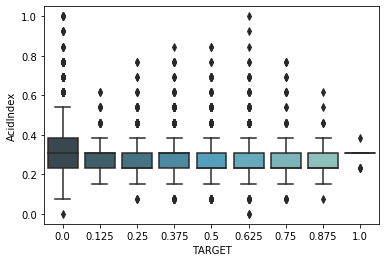

In [89]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["AcidIndex"],data=scaled_data,palette='GnBu_d')

DATA EXPLORATION

In [90]:
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.333333
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.666667
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.666667
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.000000
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.333333


In [92]:
scaled_data.drop("INDEX", axis = 1)


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.333333
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.666667
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.666667
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.000000
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0.000,0.440000,0.309119,0.739437,0.493772,0.481364,0.485569,0.491489,0.581009,0.515044,0.502035,0.307692,0.75,0.076923,NaN
12791,0.625,0.514286,0.503864,0.497183,0.790853,0.567010,0.516978,NaN,0.507175,0.704425,0.261872,NaN,0.25,0.307692,0.333333
12792,0.500,0.459048,0.457496,0.301408,0.612753,0.495242,0.492360,0.495213,0.486242,0.490265,NaN,0.544872,0.50,0.153846,0.333333
12793,0.375,0.491429,0.480680,0.473239,NaN,0.475813,0.493209,0.583511,0.485484,0.617699,0.508820,0.503205,0.25,0.153846,0.333333


In [93]:
#Create flags to suggest if a variable was missing.
for col in scaled_data.columns:
    scaled_data[col+"_missing"] = np.where(scaled_data[col].isnull(), 0, 1)

In [94]:
scaled_data.head(10)

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,...,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,Density_missing,pH_missing,Sulphates_missing,Alcohol_missing,LabelAppeal_missing,AcidIndex_missing,STARS_missing
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,...,1,0,1,1,1,1,1,1,1,1
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,...,1,1,1,1,1,1,0,1,1,1
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,...,1,1,1,1,1,1,1,1,1,1
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,...,1,1,1,1,1,1,1,1,1,1
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,...,0,1,1,1,1,1,1,1,1,1
5,0.000372,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,...,1,1,1,1,1,1,1,1,1,0
6,0.000434,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,...,1,1,1,1,1,1,1,1,1,0
7,0.000620,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,...,1,1,1,1,1,0,1,1,1,1
8,0.000682,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,...,1,1,0,1,1,1,1,1,1,0
9,0.000744,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,...,1,1,1,1,1,1,1,1,1,1


In [95]:
scaled_data.skew(axis = 0, skipna = True)

INDEX                        -0.003250
TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.053136
Chlorides                     0.030435
FreeSulfurDioxide             0.006395
TotalSulfurDioxide           -0.007181
Density                      -0.018698
pH                            0.044299
Sulphates                     0.005913
Alcohol                      -0.030723
LabelAppeal                   0.008431
AcidIndex                     1.648883
STARS                         0.447378
INDEX_missing                 0.000000
TARGET_missing                0.000000
FixedAcidity_missing          0.000000
VolatileAcidity_missing       0.000000
CitricAcid_missing            0.000000
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
Density_missing          

Skewness basically gives the shape of normal distribution of values.

If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric

In [106]:
#Square root transformation, Applied to positive values only
scaled_data["AcidIndex"] = scaled_data["AcidIndex"]**(1/2)

In [107]:
scaled_data.skew(axis = 0, skipna = True)

INDEX                        -0.003250
TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.053136
Chlorides                     0.030435
FreeSulfurDioxide             0.006395
TotalSulfurDioxide           -0.007181
Density                      -0.018698
pH                            0.044299
Sulphates                     0.005913
Alcohol                      -0.030723
LabelAppeal                   0.008431
AcidIndex                     0.767241
STARS                         0.447378
INDEX_missing                 0.000000
TARGET_missing                0.000000
FixedAcidity_missing          0.000000
VolatileAcidity_missing       0.000000
CitricAcid_missing            0.000000
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
Density_missing          

In [ ]:
#Highly correlated fields.
?
